In [40]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

plt.style.use('fivethirtyeight')

In [41]:
data = pd.read_csv('data_fully_cleaned.csv')

In [42]:
data.head()

date                   id               name  \
0  2018-12-31   1079890357540843522   SocialMktgFella    
1  2018-12-31   1079923403518177280         JohnLilic    
2  2018-12-31   1079923564130848769   Frances_Coppola    
3  2018-12-31   1079924140499333120     howardlindzon    
4  2018-12-31   1079926454840897537   Frances_Coppola    

                                                text            location  \
0   Bitcoin History Part 7: The First Major Hack ...   Orange County, CA   
1   ... but it’s not working. I love you all. Hap...     Global Coverage   
2   Hasn't it dawned on you yet that I don't writ...      United Kingdom   
3                             Hmmm I guess Bitcoin.             Coronado   
4   Bitcoin is a lot like a religion - that's kin...      United Kingdom   

   mention                                         text_clean  \
0    False   Bitcoin History Part 7: The First Major Hack ...   
1    False   ... but it’s not working. I love you all. Hap...   
2    False   Hasn't it dawned on you yet that I don't writ...   
3    False                             Hmmm I guess Bitcoin.    
4    False   Bitcoin is a lot like a religion - that's kin...   

                                          tidy_tweet  \
0  Bitcoin History Pa First Major Hack hps news b...   
1           working love Happy year bitcoin ethereum   
2  Hasn dawned that write about splinter groups w...   
3                                 Hmmm guess Bitcoin   
4  Bitcoin like religion that kinda point post th...   

                                           tokenised  \
0  ['bitcoin', 'history', 'pa', 'first', 'major',...   
1  ['working', 'love', 'happy', 'year', 'bitcoin'...   
2  ['hasn', 'dawned', 'that', 'write', 'about', '...   
3                       ['hmmm', 'guess', 'bitcoin']   
4  ['bitcoin', 'like', 'religion', 'that', 'kinda...   

                                       Tweet_nonstop  \
0  ['bitcoin', 'history', 'pa', 'first', 'major',...   
1  ['working', 'love', 'happy', 'year', 'bitcoin'...   
2  ['dawned', 'write', 'splinter', 'groups', 'wri...   
3                       ['hmmm', 'guess', 'bitcoin']   
4  ['bitcoin', 'like', 'religion', 'kinda', 'poin...   

                                       Tweet_stemmed  \
0  ['bitcoin', 'histori', 'pa', 'first', 'major',...   
1  ['work', 'love', 'happi', 'year', 'bitcoin', '...   
2  ['dawn', 'write', 'splinter', 'group', 'write'...   
3                       ['hmmm', 'guess', 'bitcoin']   
4  ['bitcoin', 'like', 'religion', 'kinda', 'poin...   

                                    Tweet_lemmatized  
0  ['bitcoin', 'history', 'pa', 'first', 'major',...  
1  ['working', 'love', 'happy', 'year', 'bitcoin'...  
2  ['dawned', 'write', 'splinter', 'group', 'writ...  
3                       ['hmmm', 'guess', 'bitcoin']  
4  ['bitcoin', 'like', 'religion', 'kinda', 'poin...

In [43]:
data.date = pd.to_datetime(data.date, format='%Y%m%d', errors='ignore')

In [44]:
# Applyting datetime format
#data.Date = pd.to_datetime(data.Date)
data.set_index('date', inplace = True)

In [45]:
#Sorting idnex
data.sort_index(inplace = True)

In [46]:
data.isnull().sum()

id                  0
name                0
text                0
location            0
mention             0
text_clean          0
tidy_tweet          5
tokenised           0
Tweet_nonstop       0
Tweet_stemmed       0
Tweet_lemmatized    0
dtype: int64

In [47]:
# dropping NaN values
data.dropna(inplace=True)
data.isnull().sum()

id                  0
name                0
text                0
location            0
mention             0
text_clean          0
tidy_tweet          0
tokenised           0
Tweet_nonstop       0
Tweet_stemmed       0
Tweet_lemmatized    0
dtype: int64

In [48]:
data.head()

id               name  \
date                                                  
2018-12-31   1079890357540843522   SocialMktgFella    
2018-12-31   1079923403518177280         JohnLilic    
2018-12-31   1079923564130848769   Frances_Coppola    
2018-12-31   1079924140499333120     howardlindzon    
2018-12-31   1079926454840897537   Frances_Coppola    

                                                          text  \
date                                                             
2018-12-31    Bitcoin History Part 7: The First Major Hack ...   
2018-12-31    ... but it’s not working. I love you all. Hap...   
2018-12-31    Hasn't it dawned on you yet that I don't writ...   
2018-12-31                              Hmmm I guess Bitcoin.    
2018-12-31    Bitcoin is a lot like a religion - that's kin...   

                       location  mention  \
date                                       
2018-12-31    Orange County, CA    False   
2018-12-31      Global Coverage    False   
2018-12-31       United Kingdom    False   
2018-12-31             Coronado    False   
2018-12-31       United Kingdom    False   

                                                    text_clean  \
date                                                             
2018-12-31    Bitcoin History Part 7: The First Major Hack ...   
2018-12-31    ... but it’s not working. I love you all. Hap...   
2018-12-31    Hasn't it dawned on you yet that I don't writ...   
2018-12-31                              Hmmm I guess Bitcoin.    
2018-12-31    Bitcoin is a lot like a religion - that's kin...   

                                                    tidy_tweet  \
date                                                             
2018-12-31   Bitcoin History Pa First Major Hack hps news b...   
2018-12-31            working love Happy year bitcoin ethereum   
2018-12-31   Hasn dawned that write about splinter groups w...   
2018-12-31                                  Hmmm guess Bitcoin   
2018-12-31   Bitcoin like religion that kinda point post th...   

                                                     tokenised  \
date                                                             
2018-12-31   ['bitcoin', 'history', 'pa', 'first', 'major',...   
2018-12-31   ['working', 'love', 'happy', 'year', 'bitcoin'...   
2018-12-31   ['hasn', 'dawned', 'that', 'write', 'about', '...   
2018-12-31                        ['hmmm', 'guess', 'bitcoin']   
2018-12-31   ['bitcoin', 'like', 'religion', 'that', 'kinda...   

                                                 Tweet_nonstop  \
date                                                             
2018-12-31   ['bitcoin', 'history', 'pa', 'first', 'major',...   
2018-12-31   ['working', 'love', 'happy', 'year', 'bitcoin'...   
2018-12-31   ['dawned', 'write', 'splinter', 'groups', 'wri...   
2018-12-31                        ['hmmm', 'guess', 'bitcoin']   
2018-12-31   ['bitcoin', 'like', 'religion', 'kinda', 'poin...   

                                                 Tweet_stemmed  \
date                                                             
2018-12-31   ['bitcoin', 'histori', 'pa', 'first', 'major',...   
2018-12-31   ['work', 'love', 'happi', 'year', 'bitcoin', '...   
2018-12-31   ['dawn', 'write', 'splinter', 'group', 'write'...   
2018-12-31                        ['hmmm', 'guess', 'bitcoin']   
2018-12-31   ['bitcoin', 'like', 'religion', 'kinda', 'poin...   

                                              Tweet_lemmatized  
date                                                            
2018-12-31   ['bitcoin', 'history', 'pa', 'first', 'major',...  
2018-12-31   ['working', 'love', 'happy', 'year', 'bitcoin'...  
2018-12-31   ['dawned', 'write', 'splinter', 'group', 'writ...  
2018-12-31                        ['hmmm', 'guess', 'bitcoin']  
2018-12-31   ['bitcoin', 'like', 'religion', 'kinda', 'poin...

In [49]:
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['tidy_tweet'].apply(sid.polarity_scores)

In [50]:
# getting the sentiment score
sentiment = sentiment_scores.apply(lambda x: x['compound'])

In [51]:
# creating the sentiment column
data['sentiment'] = sentiment

In [52]:
data.head()

id               name  \
date                                                  
2018-12-31   1079890357540843522   SocialMktgFella    
2018-12-31   1079923403518177280         JohnLilic    
2018-12-31   1079923564130848769   Frances_Coppola    
2018-12-31   1079924140499333120     howardlindzon    
2018-12-31   1079926454840897537   Frances_Coppola    

                                                          text  \
date                                                             
2018-12-31    Bitcoin History Part 7: The First Major Hack ...   
2018-12-31    ... but it’s not working. I love you all. Hap...   
2018-12-31    Hasn't it dawned on you yet that I don't writ...   
2018-12-31                              Hmmm I guess Bitcoin.    
2018-12-31    Bitcoin is a lot like a religion - that's kin...   

                       location  mention  \
date                                       
2018-12-31    Orange County, CA    False   
2018-12-31      Global Coverage    False   
2018-12-31       United Kingdom    False   
2018-12-31             Coronado    False   
2018-12-31       United Kingdom    False   

                                                    text_clean  \
date                                                             
2018-12-31    Bitcoin History Part 7: The First Major Hack ...   
2018-12-31    ... but it’s not working. I love you all. Hap...   
2018-12-31    Hasn't it dawned on you yet that I don't writ...   
2018-12-31                              Hmmm I guess Bitcoin.    
2018-12-31    Bitcoin is a lot like a religion - that's kin...   

                                                    tidy_tweet  \
date                                                             
2018-12-31   Bitcoin History Pa First Major Hack hps news b...   
2018-12-31            working love Happy year bitcoin ethereum   
2018-12-31   Hasn dawned that write about splinter groups w...   
2018-12-31                                  Hmmm guess Bitcoin   
2018-12-31   Bitcoin like religion that kinda point post th...   

                                                     tokenised  \
date                                                             
2018-12-31   ['bitcoin', 'history', 'pa', 'first', 'major',...   
2018-12-31   ['working', 'love', 'happy', 'year', 'bitcoin'...   
2018-12-31   ['hasn', 'dawned', 'that', 'write', 'about', '...   
2018-12-31                        ['hmmm', 'guess', 'bitcoin']   
2018-12-31   ['bitcoin', 'like', 'religion', 'that', 'kinda...   

                                                 Tweet_nonstop  \
date                                                             
2018-12-31   ['bitcoin', 'history', 'pa', 'first', 'major',...   
2018-12-31   ['working', 'love', 'happy', 'year', 'bitcoin'...   
2018-12-31   ['dawned', 'write', 'splinter', 'groups', 'wri...   
2018-12-31                        ['hmmm', 'guess', 'bitcoin']   
2018-12-31   ['bitcoin', 'like', 'religion', 'kinda', 'poin...   

                                                 Tweet_stemmed  \
date                                                             
2018-12-31   ['bitcoin', 'histori', 'pa', 'first', 'major',...   
2018-12-31   ['work', 'love', 'happi', 'year', 'bitcoin', '...   
2018-12-31   ['dawn', 'write', 'splinter', 'group', 'write'...   
2018-12-31                        ['hmmm', 'guess', 'bitcoin']   
2018-12-31   ['bitcoin', 'like', 'religion', 'kinda', 'poin...   

                                              Tweet_lemmatized  sentiment  
date                                                                       
2018-12-31   ['bitcoin', 'history', 'pa', 'first', 'major',...     0.0000  
2018-12-31   ['working', 'love', 'happy', 'year', 'bitcoin'...     0.8360  
2018-12-31   ['dawned', 'write', 'splinter', 'group', 'writ...     0.4588  
2018-12-31                        ['hmmm', 'guess', 'bitcoin']     0.0000  
2018-12-31   ['bitcoin', 'like', 'religion', 'kinda', 'poin...     0.6486

In [53]:
# Print out the text of a positive tweet
print(data[sentiment > 0.5]['tidy_tweet'].values[0])

# Print out the text of a negative tweet
print(data[sentiment < -0.5]['tidy_tweet'].values[0])



working love Happy year bitcoin ethereum
year Lancaster woman murdered Philippines allegedly boyfriend noted Bitcoin trader friend were being held murder charge police Philippines hp


In [54]:
sentiment_df = data.groupby(data.index, as_index=True, sort=False)['sentiment'].mean()
print (sentiment_df.head())

date
2018-12-31     0.195883
2019-01-01     0.143060
2019-01-02     0.065394
2019-01-03     0.146835
2019-01-04     0.092794
Name: sentiment, dtype: float64


In [55]:
# Plot average #python sentiment per day
plt.subplots(figsize=(200,100))
plt.plot(sentiment_df.index, sentiment_df, color = 'blue')

# Plot average #rstats sentiment per day
#plt.plot(sentiment_r.index.day, sentiment_r, color = 'blue')

plt.xlabel('Day')
plt.ylabel('Sentiment')
plt.title('Sentiment of BTC twitter')
plt.legend(('#python', '#rstats'))
plt.savefig('Sentiment_of_BTC_twitter.png')
plt.show()


In [18]:

sentiment_data = go.Scatter(x=sentiment_df.index,
                         y=sentiment_df)

layout = go.Layout(title='Avg Sentiment Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(Sentiment Score)'))

fig = go.Figure(data=[sentiment_data], layout=layout)
#plt.savefig(2.png')
iplot(fig)

In [19]:
data.to_csv('data_cleaned_w_sentiment.csv')

In [20]:
# loading btc data

In [56]:
btc = pd.read_csv('market_price.csv', header=None)

In [57]:
btc = btc.rename(columns={0: "date", 1: "price"})

In [58]:
btc['date'] = pd.to_datetime(btc['date'], infer_datetime_format=True)

In [59]:
btc.date = pd.to_datetime(btc.date, format='%Y%m%d')

In [60]:
btc.date = pd.to_datetime(btc.date, format='%Y%m%d', errors='ignore')

In [61]:
# Applyting datetime format
#data.Date = pd.to_datetime(data.Date)
btc.set_index('date', inplace = True)

In [62]:
#Sorting idnex
btc.sort_index(inplace = True)

In [63]:
btc.price = round(btc.price, 2)

In [64]:
btc.head()

price
date               
2018-12-31  3791.55
2019-01-01  3752.27
2019-01-02  3867.14
2019-01-03  3865.80
2019-01-04  3822.63

In [65]:
sentiment_df.head()

date
2018-12-31     0.195883
2019-01-01     0.143060
2019-01-02     0.065394
2019-01-03     0.146835
2019-01-04     0.092794
Name: sentiment, dtype: float64

In [66]:
sentiment_d = pd.DataFrame(sentiment_df)

In [67]:
sentiment_d.columns

Index(['sentiment'], dtype='object')

In [70]:
btc = btc[:-5]

In [71]:
btc.shape

(156, 1)

In [69]:
sentiment_d.shape

(156, 1)

In [72]:
sentiment_d['price'] = btc['price'].values

In [73]:
sentiment_d.head()

sentiment    price
date                           
2018-12-31    0.195883  3791.55
2019-01-01    0.143060  3752.27
2019-01-02    0.065394  3867.14
2019-01-03    0.146835  3865.80
2019-01-04    0.092794  3822.63

In [74]:
#Correlation of all values
cor = sentiment_d.corr()
cor

sentiment     price
sentiment   1.000000  0.107462
price       0.107462  1.000000

In [75]:
# standardising

In [76]:
normalized_trends = sentiment_d.copy()

In [77]:
normalized_trends = (normalized_trends - normalized_trends.mean())/normalized_trends.std()

In [78]:
normalized_trends.head()

sentiment     price
date                            
2018-12-31    1.757744 -0.673855
2019-01-01    0.770578 -0.698975
2019-01-02   -0.680875 -0.625515
2019-01-03    0.841126 -0.626372
2019-01-04   -0.168818 -0.653980

In [79]:
# Plot average #python sentiment per day
plt.subplots(figsize=(200,100))
plt.plot(normalized_trends.index, normalized_trends.sentiment, color = 'blue')
plt.plot(normalized_trends.index, normalized_trends.price, color = 'red')
# Plot average #rstats sentiment per day
#plt.plot(sentiment_r.index.day, sentiment_r, color = 'blue')

plt.xlabel('Day')
plt.ylabel('Sentiment')
plt.title('Sentiment of BTC twitter')
plt.legend(('#python', '#rstats'))
plt.savefig('Sentiment_of_BTC_twitter.png')
plt.show()

In [80]:
# Creating trace1
trace1 = go.Scatter(
                    x = normalized_trends.index,
                    y = normalized_trends.sentiment,
                    mode = "lines",
                    name = "sentiment",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= normalized_trends.index)
# Creating trace2
trace2 = go.Scatter(
                    x = normalized_trends.index,
                    y = normalized_trends.price,
                    mode = "lines+markers",
                    name = "price",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= normalized_trends.index)
data_plot = [trace1, trace2]
layout = dict(title = 'Standardised sentiment vs price',
              xaxis= dict(title= '',ticklen= 5,zeroline= False)
             )
fig = dict(data = data_plot, layout = layout)
iplot(fig)

In [81]:
# price vs # of tweets

In [82]:
daily_tweets = data.groupby(data.index).size()

In [83]:
daily_tweets = pd.DataFrame(daily_tweets)

In [84]:
daily_tweets.shape

(156, 1)

In [85]:
sentiment_d['count'] = daily_tweets.values

In [86]:
sentiment_d.head()

sentiment    price  count
date                                  
2018-12-31    0.195883  3791.55     36
2019-01-01    0.143060  3752.27    106
2019-01-02    0.065394  3867.14    205
2019-01-03    0.146835  3865.80    336
2019-01-04    0.092794  3822.63    157

In [87]:
normalized_trends_2 = (sentiment_d - sentiment_d.mean())/sentiment_d.std()

In [88]:
normalized_trends_2.head()

sentiment     price     count
date                                      
2018-12-31    1.757744 -0.673855 -1.785841
2019-01-01    0.770578 -0.698975 -0.875795
2019-01-02   -0.680875 -0.625515  0.411271
2019-01-03    0.841126 -0.626372  2.114358
2019-01-04   -0.168818 -0.653980 -0.212761

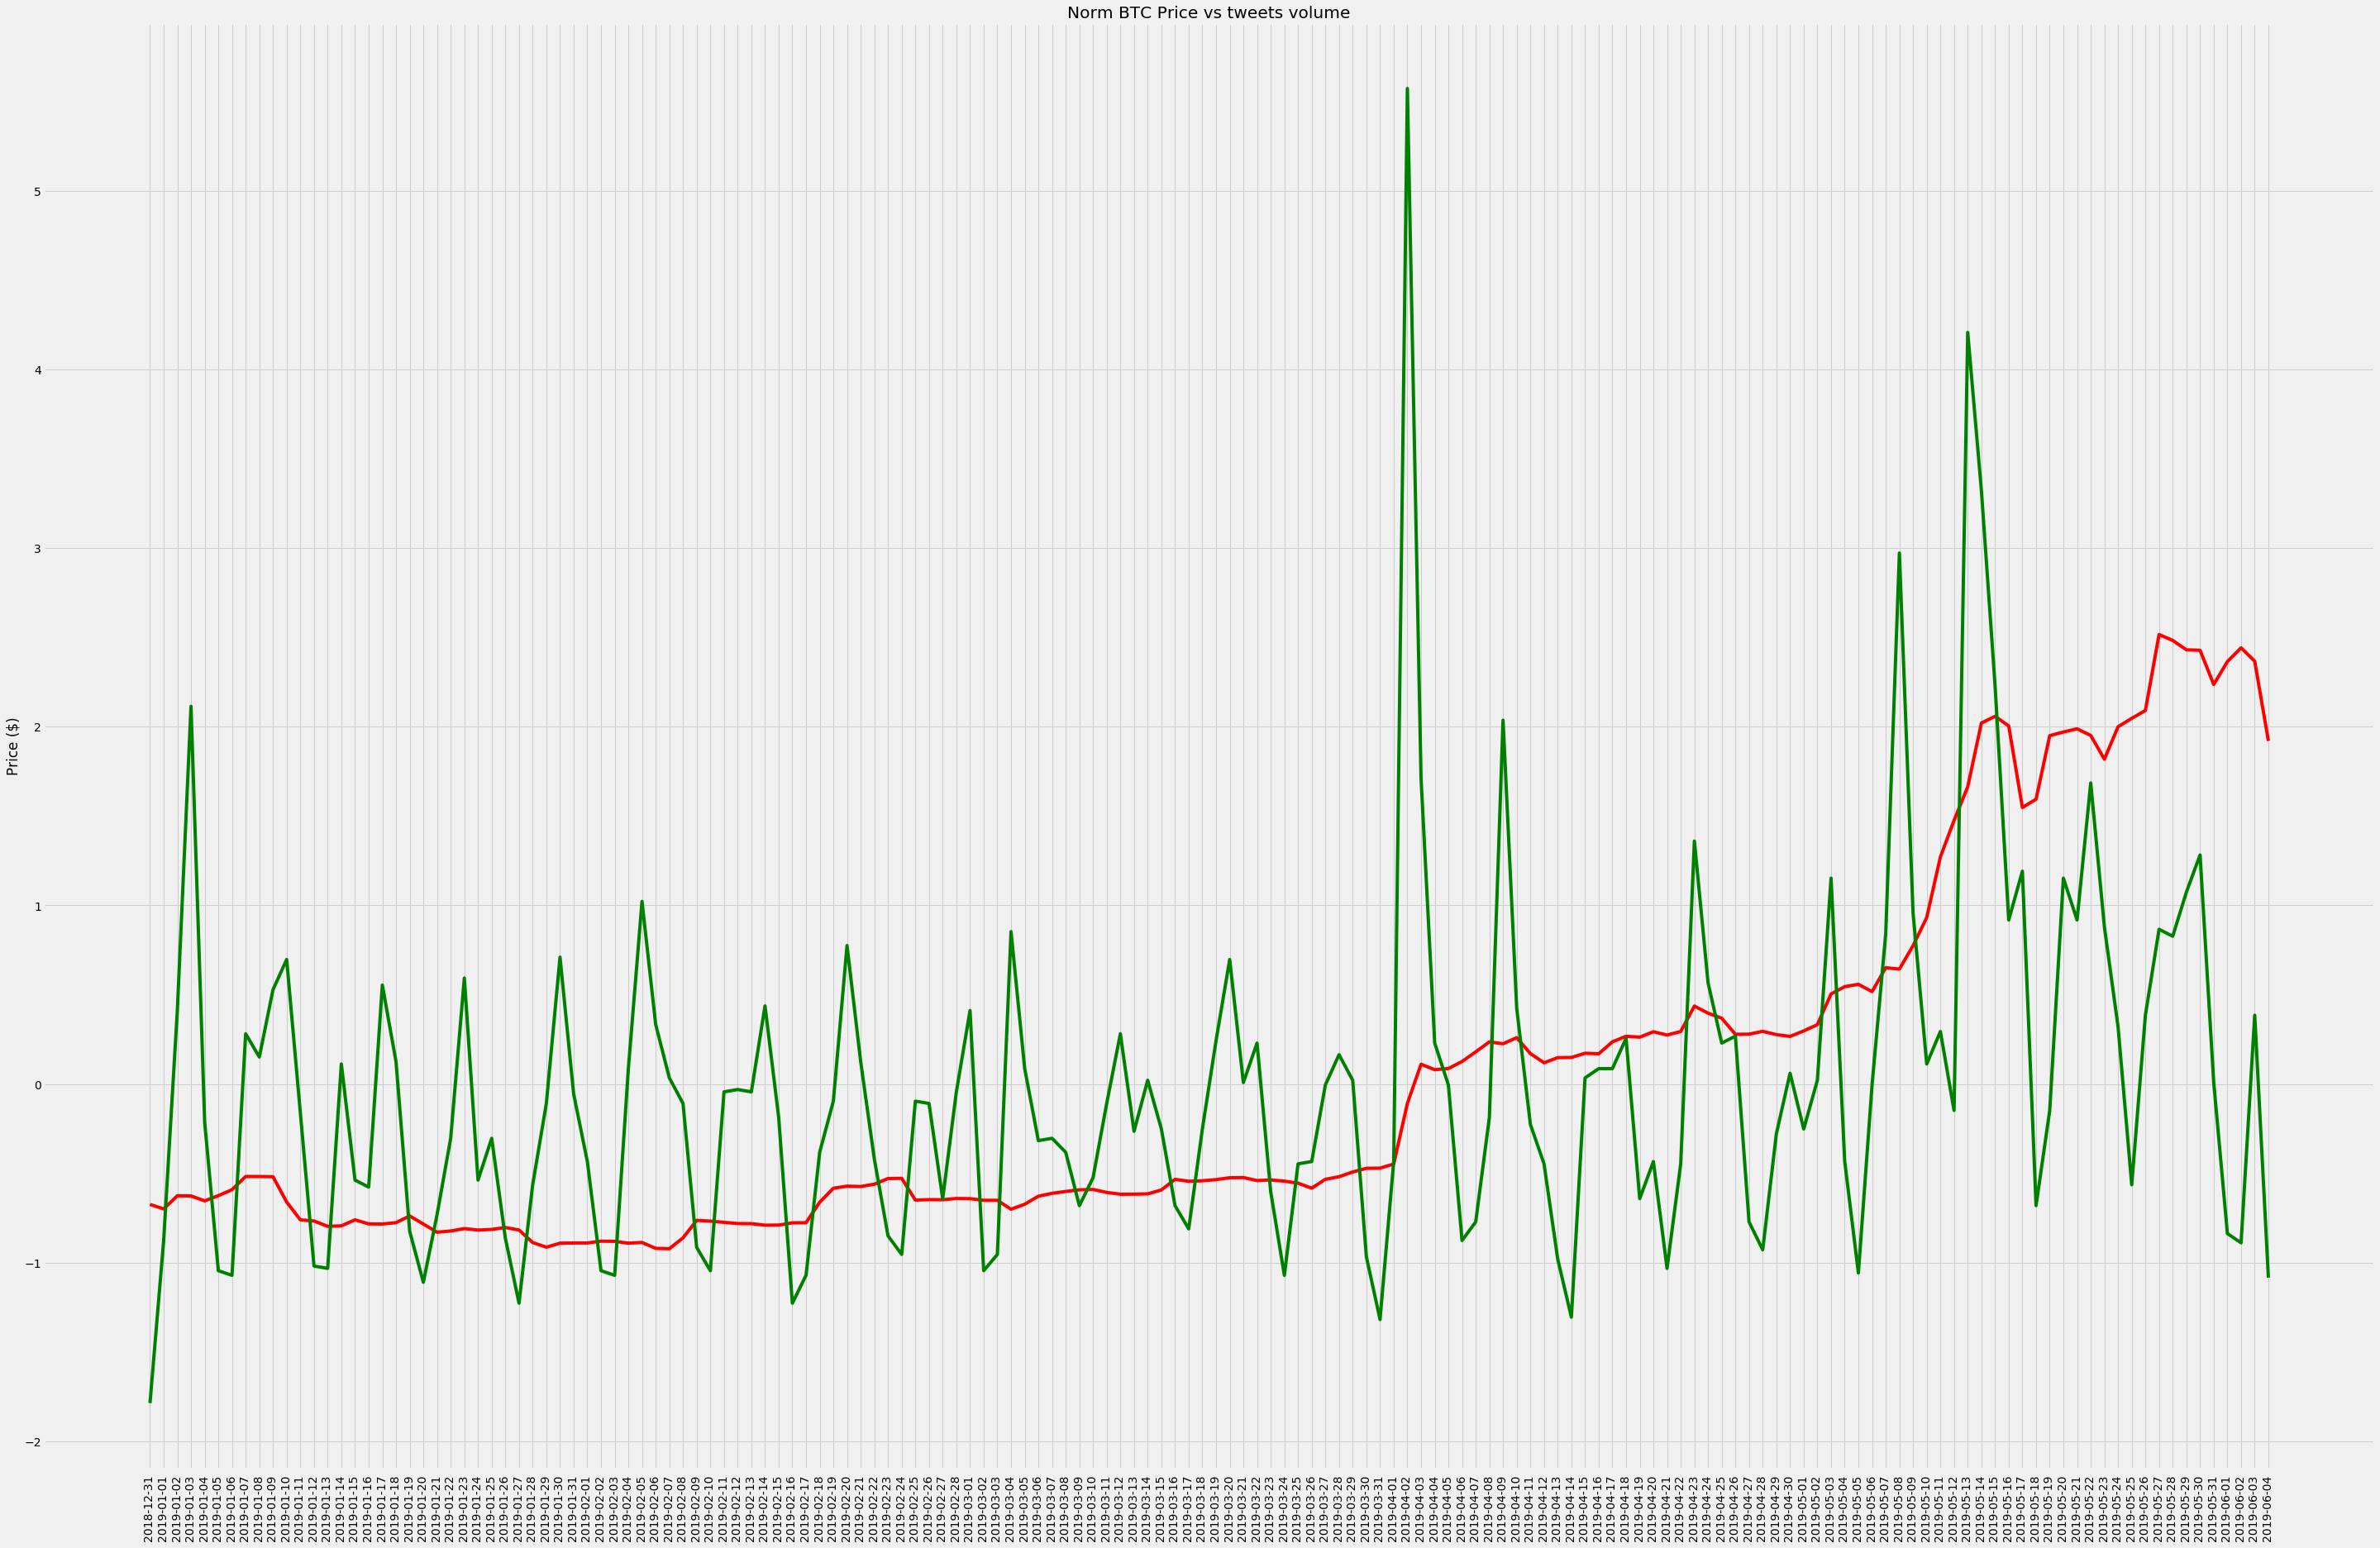

In [89]:
plt.figure(figsize=(45,30))
plt.plot(normalized_trends_2.index, normalized_trends_2['price'], 'red')
plt.plot(normalized_trends_2.index, normalized_trends_2['count'], 'g')
plt.title('Norm BTC Price vs tweets volume')
plt.xticks(rotation='vertical')
plt.savefig('Norm_BTC_Price_vs_tweets_volume.png')
plt.ylabel('Price ($)');
plt.show();

In [94]:
# Creating trace1
trace1 = go.Scatter(
                    x = normalized_trends_2.index,
                    y = normalized_trends_2['count'],
                    mode = "lines",
                    name = "count",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= normalized_trends.index)
# Creating trace2
trace2 = go.Scatter(
                    x = normalized_trends_2.index,
                    y = normalized_trends_2['price'],
                    mode = "lines+markers",
                    name = "price",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= normalized_trends.index)
data_plot = [trace1, trace2]
layout = dict(title = 'Stand BTC Price vs tweets volume',
              xaxis= dict(title= '',ticklen= 5,zeroline= False)
             )
fig = dict(data = data_plot, layout = layout)
iplot(fig)

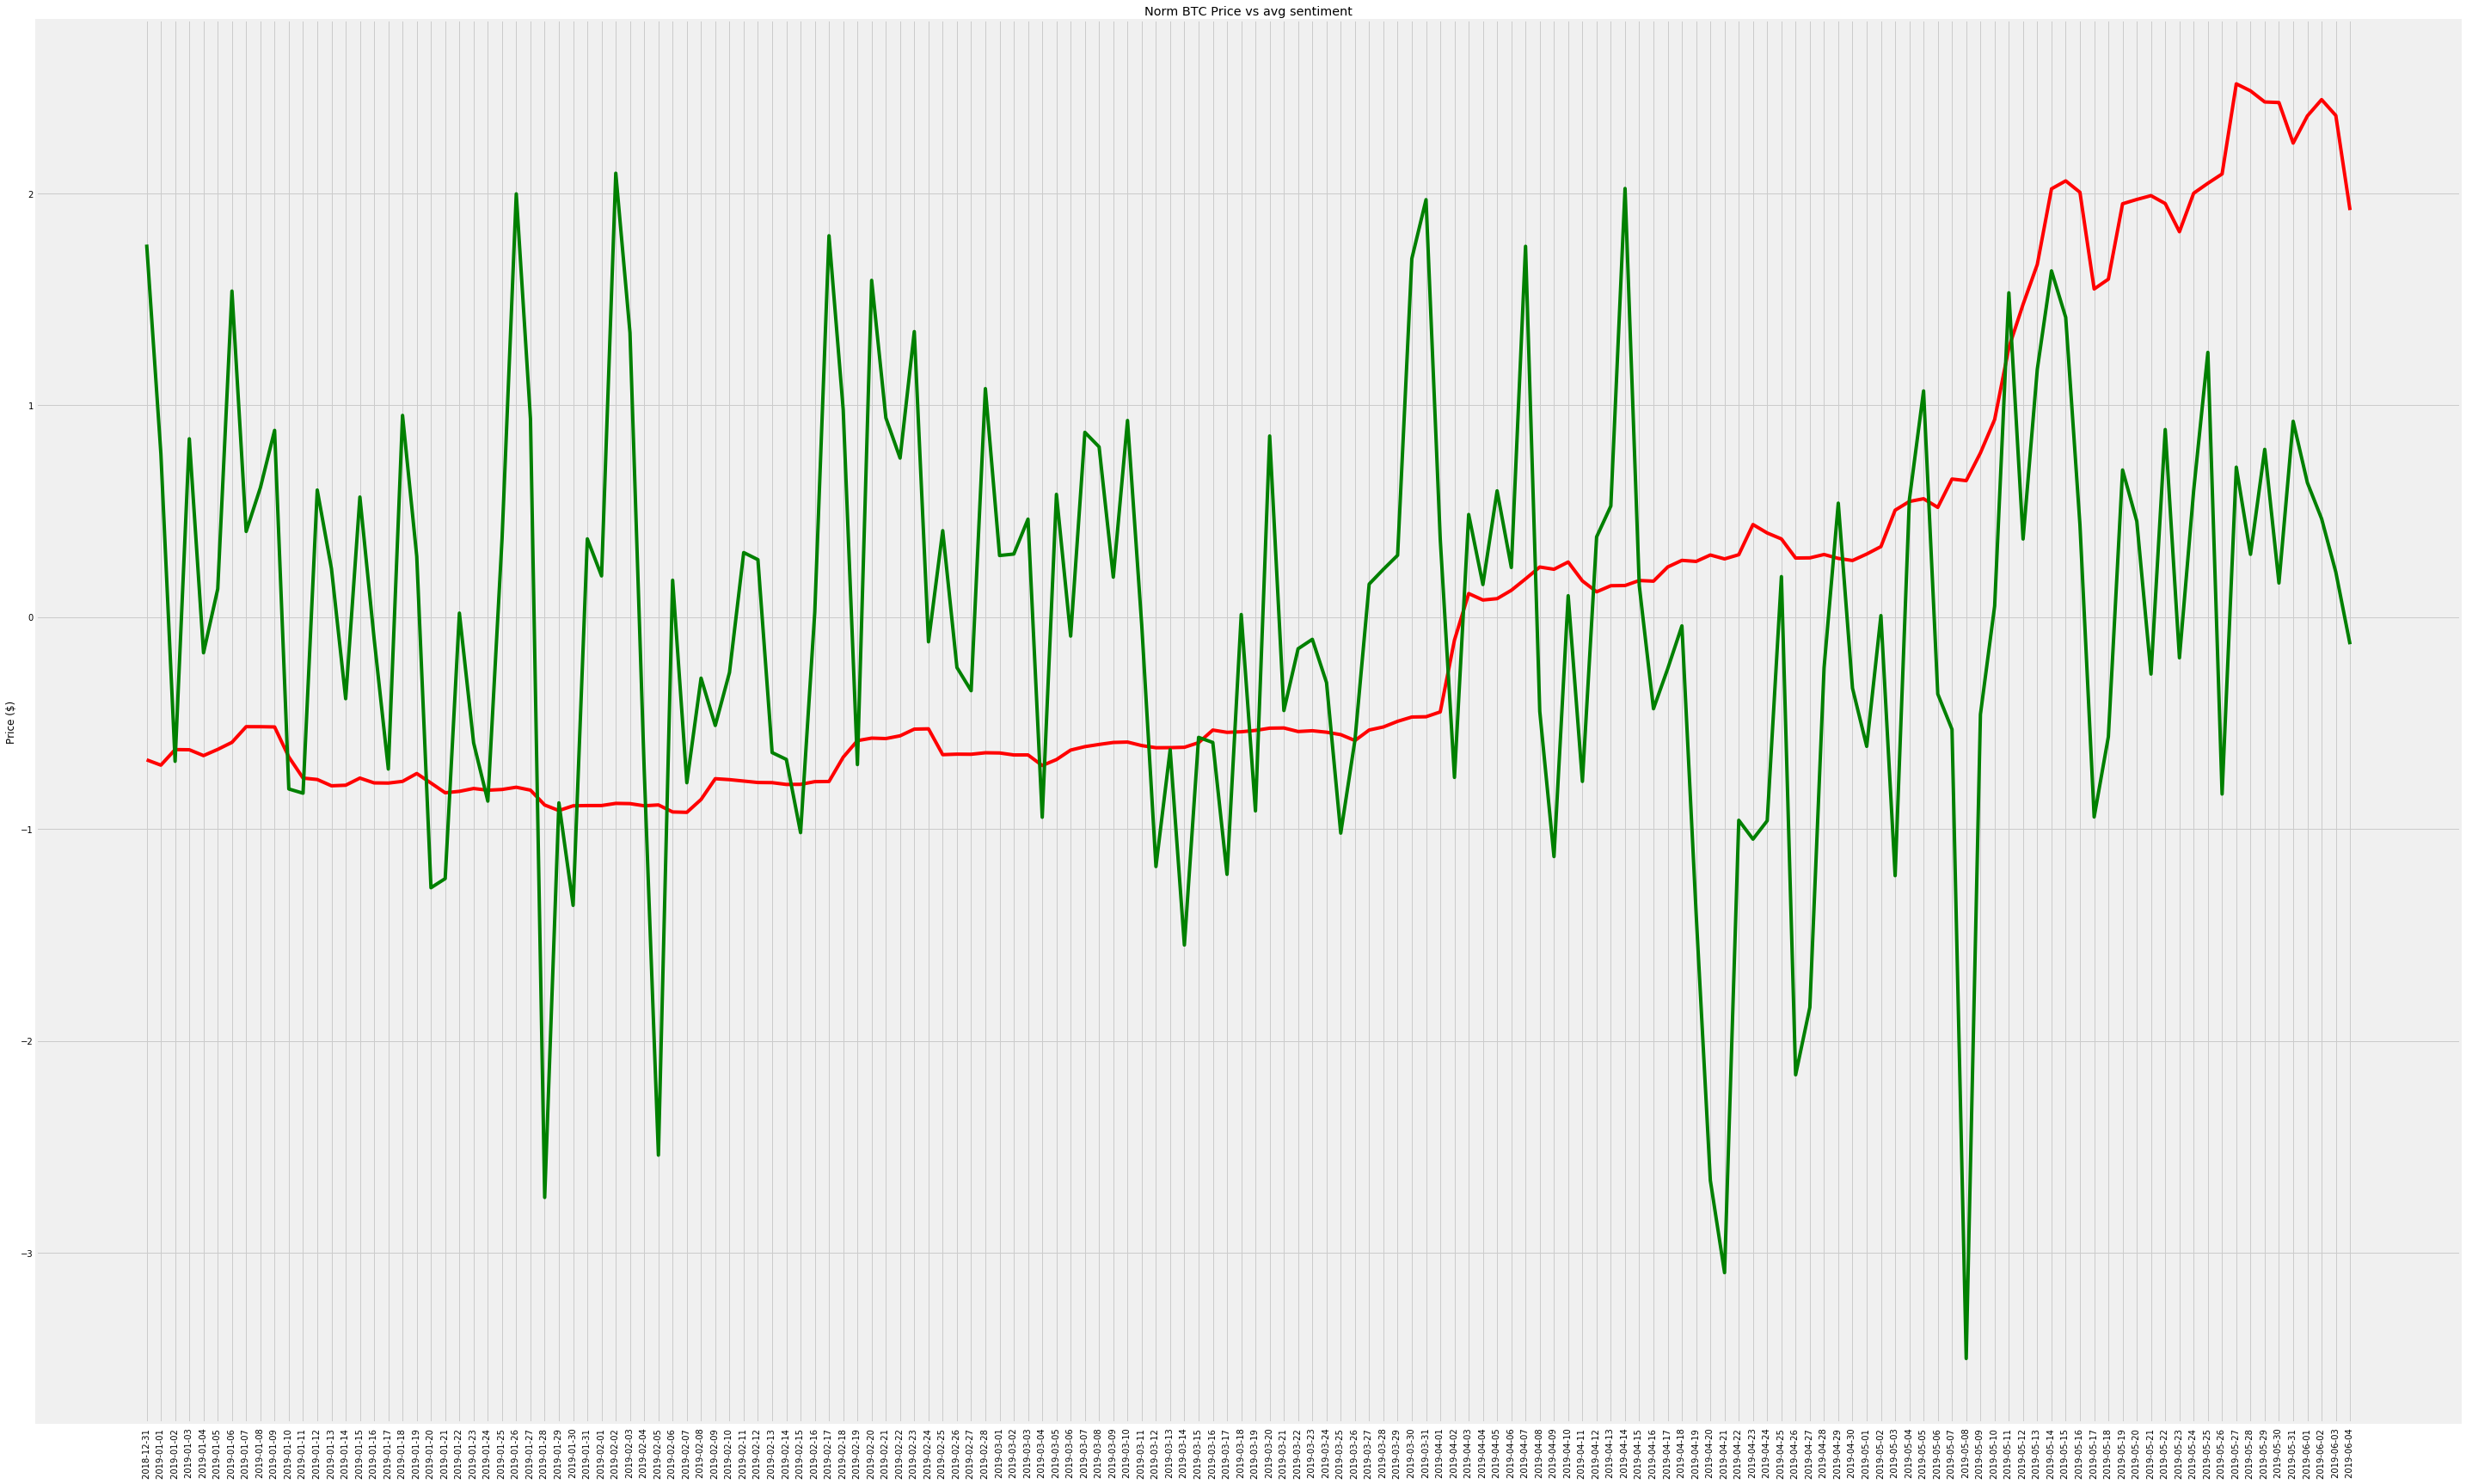

In [81]:
plt.figure(figsize=(45,30))
plt.plot(normalized_trends_2.index, normalized_trends_2['price'], 'red')
plt.plot(normalized_trends_2.index, normalized_trends_2['sentiment'], 'g')
plt.title('Norm BTC Price vs avg sentiment')
plt.xticks(rotation='vertical')
plt.savefig('Norm_BTC_Price_vs_avg_sentiment.png')
plt.ylabel('Price ($)');
plt.show();

In [69]:
positive = data.loc[data['sentiment'] > 0.25]

In [70]:
positive.shape

(9467, 12)

In [71]:
positive_sentiment_df = positive.groupby(positive.index, as_index=True, sort=False)['sentiment'].mean()
positive_sentiment_df.head()

date
2018-12-31     0.601971
2019-01-01     0.570237
2019-01-02     0.564519
2019-01-03     0.606730
2019-01-04     0.576300
Name: sentiment, dtype: float64

In [72]:
positive_sentiment_data = go.Scatter(x=positive_sentiment_df.index,
                         y=positive_sentiment_df)

layout = go.Layout(title='Positive Sentiment Dynamic', xaxis=dict(title='Date'),
                   yaxis=dict(title='(Sentiment Score)'))

fig = go.Figure(data=[positive_sentiment_data], layout=layout)
#plt.savefig(2.png')
iplot(fig)

In [73]:
# Print out the text of a negative tweet
negative = data.loc[data['sentiment'] < -0.25]
negative.shape

(4737, 12)

In [74]:
negative_sentiment_df = negative.groupby(negative.index, as_index=True, sort=False)['sentiment'].mean()
negative_sentiment_df.shape

(156,)

In [76]:
negative_sentiment_data = go.Scatter(x=negative_sentiment_df.index,
                         y=negative_sentiment_df)

layout = go.Layout(title='Negative Sentiment Dynamic', xaxis=dict(title='Date'),
                   yaxis=dict(title='(Sentiment Score)'))

fig = go.Figure(data=[negative_sentiment_data], layout=layout)
#plt.savefig(2.png')
iplot(fig)

In [95]:
# tweet count

In [99]:

sentiment_data = go.Scatter(x=sentiment_d.index,
                         y=sentiment_d['count'])

layout = go.Layout(title='Twet count', xaxis=dict(title='Date'),
                   yaxis=dict(title='# of tweets'))

fig = go.Figure(data=[sentiment_data], layout=layout)
#plt.savefig(2.png')
iplot(fig)